In [30]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# read the CSV file using pandas and store it in a variable called raw_data
# the 'encoding' parameter is used to specify the character encoding of the file
# in this case, it is set to 'Latin1'
raw_data = pd.read_csv(r"C:\Users\ManishChand-octr\Desktop\Text Mining and Twitter\Dataset\raw data\rawdata.csv", encoding = "Latin1")
raw_data.head()

,Tweets,Retweets,Likes,Date
0,@PeterSchiff ð¤£ thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k ð»,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32


In [32]:
# renaming the column 'Text' to 'Tweets'
raw_data.rename({'Text':'Tweets'},axis=1,inplace=True)
# displaying the first few rows of the dataset
raw_data.head()

,Tweets,Retweets,Likes,Date
0,@PeterSchiff ð¤£ thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k ð»,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32


In [33]:
# Join all the tweets into a single string
text_total = " ".join(raw_data["Tweets"])
# Print the first 1000 characters of the combined text
text_total[:1000]

'@PeterSchiff ð\x9f¤£ thanks @ZubyMusic Absolutely Dear Twitter Advertisers https://t.co/GMwHmInPAS @BillyM2k ð\x9f\x91» Meeting a lot of cool people at Twitter today! Entering Twitter HQ â\x80\x93 let that sink in! https://t.co/D68z4K2wq7 @dogeofficialceo @mtaibbi ð\x9f¤£ð\x9f\x92ª @mtaibbi ð\x9f¤£ @ARodTV Definitely closer to citizen journalism â\x80\x93 local news orgs are under-appreciated &amp; should get way more prominence on Twitter @sandyleevincent Nobody bats 1000 ð\x9f¤·â\x80\x8dâ\x99\x82ï¸\x8f A beautiful thing about Twitter is how it empowers citizen journalism â\x80\x93 people are able to disseminate news without an establishment bias @teslaownersSV Iâ\x80\x99m a big fan of citizen journalism! â\x80\x9cAccording to unnamed sources close to the matter who wish to remain anonymousâ\x80\x9d ð\x9f¤£ð\x9f¤£ â\x80\x9cThe New York Times has emerged as a new, chaotic actor in global politics. The paperâ\x80\x99s interventions in some of the worldâ\x80\x99s most combustible confli

In [34]:
chars = sorted(list(set(text_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !#$%&'()*+,-./0123456789:;=?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_abcdefghijklmnopqrstuvwxyz{|}~ ¡¢£¤¥¦§¨©ª«¬­®¯°±²³´µ¶·¸¹º»¼½¾¿ÂÃÌÎÏÐÑâãäåæçèéïð
171


In [35]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweets    3060 non-null   object
 1   Retweets  3060 non-null   int64 
 2   Likes     3060 non-null   int64 
 3   Date      3060 non-null   object
dtypes: int64(2), object(2)
memory usage: 95.8+ KB


In [36]:
raw_data.isnull().sum()

Tweets      0
Retweets    0
Likes       0
Date        0
dtype: int64

In [37]:
data = raw_data.copy()

In [38]:
import re #regular expression
import string

def cleaning_text(text):

      text = re.sub('U+0001F923', "", text)
      text = re.sub('U+0001F3B6', "", text)
      text = re.sub('U+0001F5A4', "", text)
      text = re.sub('@[\w]*', " ", text)
      text = re.sub('https?://\S+|www\.\S+', " ", text)
      text = re.sub('\n',  " ", text)
      text = re.sub("ß", "b", text)
      text = re.sub("ð", "o", text)
      text = re.sub("ö", "o", text)
      text = re.sub("ø", "o", text)
      text = re.sub("ü", "u", text)
      text = re.sub("à", "a", text)
      text = re.sub("ä", "a", text)
      text = re.sub("è", "e", text)
      text = re.sub("é", "e", text)
      text = re.sub('', "", text)
      text = re.sub('', "", text)
      text = re.sub('\[.*?\]', '', text)
      text = re.sub('https?://\S+|www\.\S+', '', text)
      text = re.sub('<.*?>+', '', text)
      text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
      text = re.sub('\w*\d\w*', '', text)
      text = re.sub('@[\w]*', '', text)
      text = re.sub("[0-9" "]+"," ",text)
      text = re.sub('[‘’“”…]', '', text)
 
      return text

cleaning = lambda x: cleaning_text(x)

def clean_text(text):

      text = text.lower()
      text = re.sub(r'[^\w\s]'," ", text)
      
      return text

clean = lambda x: clean_text(x)

In [39]:
data['Cleaned_Tweets'] = data.Tweets.apply(cleaning)
data.head(20)

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff ð¤£ thanks,209,7021,2022-10-27 16:17:39,o¤£ thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k ð»,802,19353,2022-10-27 02:32:48,o»
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today
5,Entering Twitter HQ â let that sink in! http...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ â let that sink in
6,@dogeofficialceo @mtaibbi ð¤£ðª,194,3611,2022-10-26 17:18:30,o¤£oª
7,@mtaibbi ð¤£,117,2848,2022-10-26 17:14:07,o¤£
8,@ARodTV Definitely closer to citizen journalis...,699,10189,2022-10-26 17:05:16,Definitely closer to citizen journalism â ...
9,@sandyleevincent Nobody bats 1000 ð¤·ââï¸,126,2920,2022-10-26 15:42:50,Nobody bats o¤·ââï¸


In [40]:
data['Cleaned_Tweets'] = data.Cleaned_Tweets.apply(clean)
data.head(5)

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff ð¤£ thanks,209,7021,2022-10-27 16:17:39,o thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers
3,@BillyM2k ð»,802,19353,2022-10-27 02:32:48,o
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting a lot of cool people at twitter today


In [41]:
clean_total = " ".join(data["Cleaned_Tweets"])
chars = sorted(list(set(clean_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 abcdefghijklmnopqrstuvwxyz ª²³µ¹º¼½¾âãåæçìîïðñ
47


In [42]:
data = data[data['Cleaned_Tweets']!='']
data.head(10)

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff ð¤£ thanks,209,7021,2022-10-27 16:17:39,o thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers
3,@BillyM2k ð»,802,19353,2022-10-27 02:32:48,o
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting a lot of cool people at twitter today
5,Entering Twitter HQ â let that sink in! http...,145520,1043592,2022-10-26 18:45:58,entering twitter hq â let that sink in
6,@dogeofficialceo @mtaibbi ð¤£ðª,194,3611,2022-10-26 17:18:30,o o ª
7,@mtaibbi ð¤£,117,2848,2022-10-26 17:14:07,o
8,@ARodTV Definitely closer to citizen journalis...,699,10189,2022-10-26 17:05:16,definitely closer to citizen journalism â ...
9,@sandyleevincent Nobody bats 1000 ð¤·ââï¸,126,2920,2022-10-26 15:42:50,nobody bats o â â ï


In [43]:
from textblob import TextBlob
data['Cleaned_Tweets'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                      o    thanks
1                                       absolutely
2                        dear twitter advertised  
3                                              o  
4    meeting a lot of cool people at twitter today
Name: Cleaned_Tweets, dtype: object

In [44]:
data.shape

(3057, 5)

In [45]:
data.drop_duplicates(subset=['Cleaned_Tweets'], keep=False)
data.shape

(3057, 5)

In [46]:
#Word frequency
freq = pd.Series(' '.join(data['Cleaned_Tweets']).split()).value_counts()[:20] # for top 20
freq

the     889
to      816
is      738
a       655
of      556
o       537
in      402
i       351
that    320
for     309
be      302
amp     285
â       277
it      254
will    239
but     235
are     231
this    230
on      214
s       204
Name: count, dtype: int64

In [47]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\ManishChand-
[nltk_data]    |     octr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\ManishChand-
[nltk_data]    |     octr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\ManishChand-
[nltk_data]    |     octr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\ManishChand-
[nltk_data]    |     octr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\ManishChand-
[nltk_data]    |     octr\AppData\Roaming\nltk_data...
[nltk

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to C:\Users\ManishChand-
[nltk_data]    |     octr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     C:\Users\ManishChand-
[nltk_data]    |     octr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     C:\Users\ManishChand-
[nltk_data]    |     octr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package treebank to C:\Users\ManishChand-
[nltk_data]    |     octr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\ManishChand-
[nltk_data]    |     octr\AppData\Roaming\nltk_data..

True

In [48]:
import nltk
# nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ManishChand-
[nltk_data]     octr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Cleaned_Tweets'] = data['Cleaned_Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff ð¤£ thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers
3,@BillyM2k ð»,802,19353,2022-10-27 02:32:48,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting lot cool people twitter today
...,...,...,...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,manganese alternative iron amp phosphorus scal...
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,exactly
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,policies directly responsible outrageously hig...
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,voted office


In [50]:
TextBlob(data['Cleaned_Tweets'][3]).ngrams(1)

[]

In [51]:
TextBlob(data['Cleaned_Tweets'][4]).ngrams(5)

[WordList(['meeting', 'lot', 'cool', 'people', 'twitter']),
 WordList(['lot', 'cool', 'people', 'twitter', 'today'])]

In [52]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['Cleaned_Tweets']).split()).value_counts()[:20] # for top 20
freq_Sw

amp         285
â           277
tesla       147
would       103
good        100
people       96
twitter      95
iâ           87
much         82
yes          82
starlink     79
true         76
many         73
one          73
even         68
like         66
time         65
itâ          62
great        62
also         62
Name: count, dtype: int64

In [54]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["Cleaned_Tweets"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
print(word_freq_df.sort_values('occurrences', ascending=False).head())


        term  occurrences  frequency
166      amp          285   0.015860
4762   tesla          147   0.008180
5326   would          103   0.005732
2039    good          100   0.005565
3393  people           96   0.005342


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)  # keep top 1000 words
doc_vec = vectorizer.fit_transform(data["Cleaned_Tweets"])
names_features = vectorizer.get_feature_names_out()  # Use get_feature_names_out instead of get_feature_names
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=names_features)
df.head(10)


,able,absolutely,accelerant,according,account,accounts,accurate,achievable,acquisition,action,...,youâ,yup,zero,³o,ºo,ðµð,ðµñ,ðºð,ð½ð,ð¾ñ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [59]:
top2_words = get_top_n2_words(data["Cleaned_Tweets"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,next month,14
1,years ago,13
2,free speech,12
3,next week,10
4,fsd beta,10


C:\Users\ManishChand-octr\AppData\Local\Temp\ipykernel_11656\473816535.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])


[Text(0, 0, 'next month'),
 Text(1, 0, 'years ago'),
 Text(2, 0, 'free speech'),
 Text(3, 0, 'next week'),
 Text(4, 0, 'fsd beta'),
 Text(5, 0, 'good thread'),
 Text(6, 0, 'sustainable energy'),
 Text(7, 0, 'tesla ai'),
 Text(8, 0, 'ai day'),
 Text(9, 0, 'coming soon'),
 Text(10, 0, 'life multiplanetary'),
 Text(11, 0, 'elden ring'),
 Text(12, 0, 'ºo ºo'),
 Text(13, 0, 'good point'),
 Text(14, 0, 'feels like'),
 Text(15, 0, 'amp spacex'),
 Text(16, 0, 'pretty much'),
 Text(17, 0, 'tesla owners'),
 Text(18, 0, 'birth rate'),
 Text(19, 0, 'far left')]

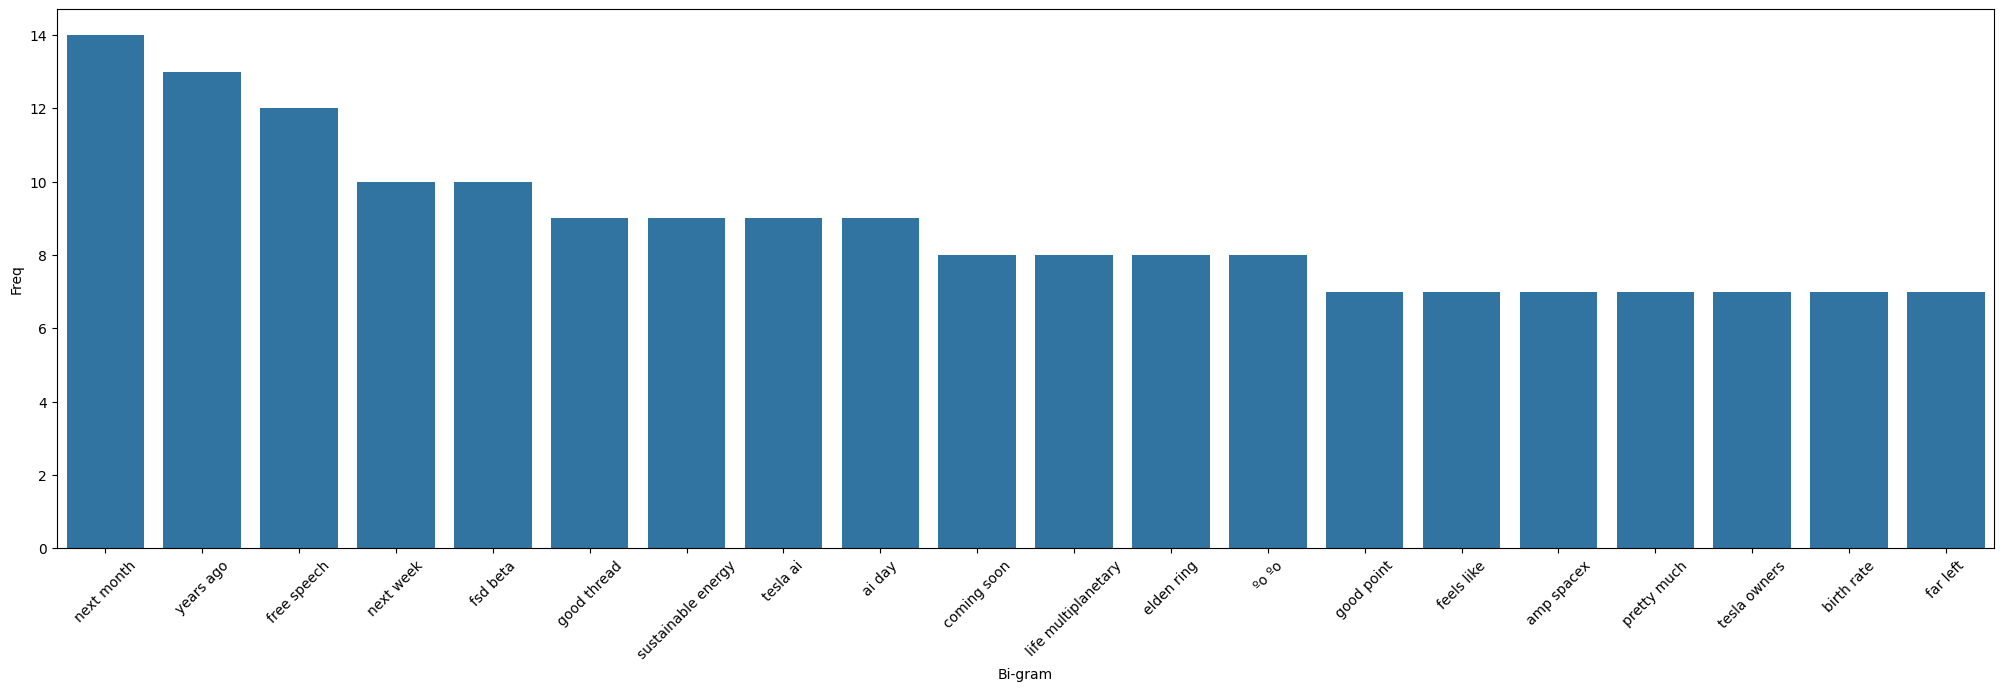

In [60]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [61]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [62]:
top3_words = get_top_n3_words(data["Cleaned_Tweets"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,tesla amp spacex,6
1,tesla ai day,6
2,make life multiplanetary,6
3,oil amp gas,5
4,spacex falcon team,5
...,...,...
195,question much death,1
196,much death amp,1
197,probable outcome far,1
198,severely damages russia,1


C:\Users\ManishChand-octr\AppData\Local\Temp\ipykernel_11656\3113432559.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])


[Text(0, 0, 'tesla amp spacex'),
 Text(1, 0, 'tesla ai day'),
 Text(2, 0, 'make life multiplanetary'),
 Text(3, 0, 'oil amp gas'),
 Text(4, 0, 'spacex falcon team'),
 Text(5, 0, 'look bright side'),
 Text(6, 0, 'burnt hair sold'),
 Text(7, 0, 'needed make life'),
 Text(8, 0, 'making great progress'),
 Text(9, 0, 'richer someone fewer'),
 Text(10, 0, 'someone fewer kids'),
 Text(11, 0, 'scope amp scale'),
 Text(12, 0, 'amp scale consciousness'),
 Text(13, 0, 'woke mind virus'),
 Text(14, 0, 'daily active users'),
 Text(15, 0, 'products amp services'),
 Text(16, 0, 'iâ big fan'),
 Text(17, 0, 'ship amp booster'),
 Text(18, 0, 'show amp tell'),
 Text(19, 0, 'amp gas industry')]

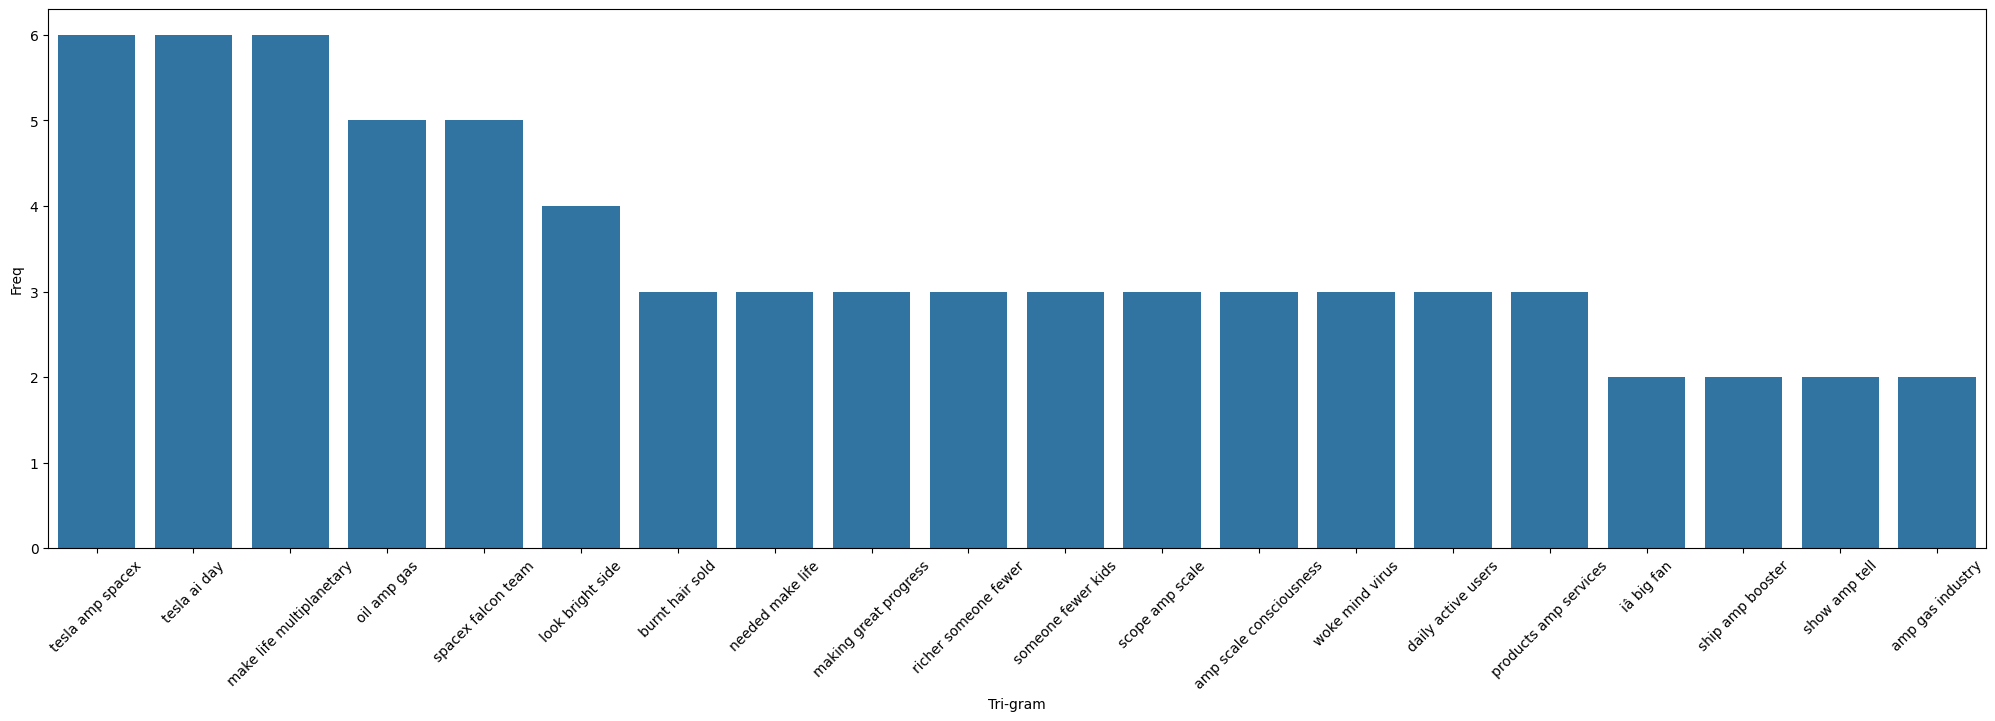

In [63]:
#Tri-gram plot
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [64]:
string_total = " ".join(data["Cleaned_Tweets"])
string_total[:2000]

'thanks absolutely dear twitter advertisers  meeting lot cool people twitter today entering twitter hq â let sink ª  definitely closer citizen journalism â local news orgs underappreciated amp get way prominence twitter nobody bats â â ï beautiful thing twitter empowers citizen journalism â people able disseminate news without establishment bias iâ big fan citizen journalism â according unnamed sources close matter wish remain anonymousâ â new york times emerged new chaotic actor global politics paperâ interventions worldâ combustible conflicts sometimes boon messaging also caused problemsâ  yes lot concerning works moving land object fasting rocks doubletake first nonfake vitalik tweet iâ seen  one manâ hedge another manâ shrub yup true much respect authority inhibits innovation ª  lesson took longest unlearn î î¹î î îµîºï î¹îºî twitter broadly inclusive possible serving fair forum lively even occasionally rancorous debate widely divergent beliefs absolutely necessary   important yup 

In [68]:
pip install wordcloud

     -------------------------------------- 300.2/300.2 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


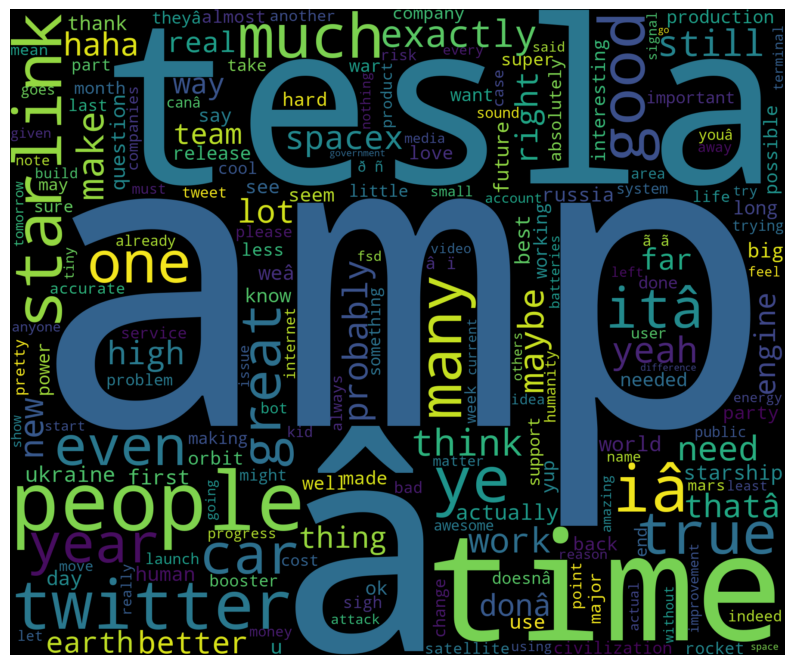

In [69]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'string_total' is a single string containing all the cleaned tweets concatenated together
wordcloud_stw = WordCloud(background_color='black', width=1800, height=1500).generate(string_total)

# Plotting the word cloud
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_stw, interpolation='bilinear')
plt.axis('off')
plt.show()


In [70]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'

In [71]:
fetch_sentiment_using_textblob = data.Cleaned_Tweets.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(fetch_sentiment_using_textblob.value_counts())

,count
Cleaned_Tweets,
positive,2713
negative,344


In [72]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\ManishChand-
[nltk_data]     octr\AppData\Roaming\nltk_data...


True

In [73]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(data.Cleaned_Tweets[3])

{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

In [74]:
df_score=pd.DataFrame()
df_score['Cleaned_Tweets'] = data.Cleaned_Tweets
df_score['scores'] = data['Cleaned_Tweets'].apply(lambda review: sid.polarity_scores(review))
df_score['compound']  = df_score['scores'].apply(lambda scores: scores['compound'])
df_score['sentiment'] = df_score['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df_score.head(10)

,Cleaned_Tweets,scores,compound,sentiment
0,thanks,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
1,absolutely,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,dear twitter advertisers,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.3818,Positive
3,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,meeting lot cool people twitter today,"{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'comp...",0.3182,Positive
5,entering twitter hq â let sink,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
6,ª,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,Neutral
7,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,Neutral
8,definitely closer citizen journalism â local n...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.4019,Positive
9,nobody bats â â ï,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

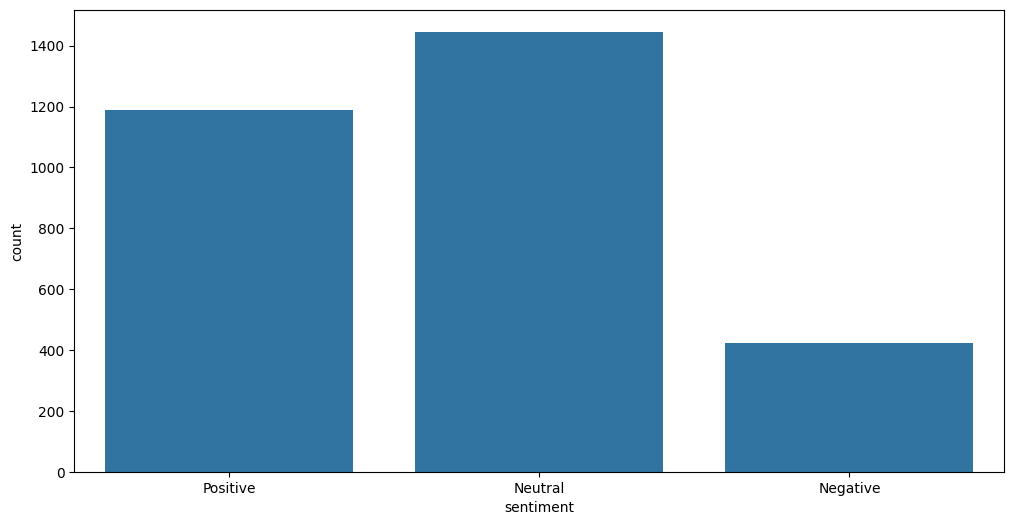

In [75]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df_score)

In [76]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [77]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df_score['Cleaned_Tweets'])

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df_score['sentiment'], test_size=0.25, random_state=7)

c:\Users\ManishChand-octr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [78]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score*100)

Accuracuy Score:  76.20915032679738


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# initialize random forest classifier
RF = RandomForestClassifier(n_estimators=100)

# fit the model with the training data
RF.fit(X_train, Y_train)

# predict on the test data
predicted = RF.predict(X_test)

# calculate accuracy
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score (Random Forest): ", accuracy_score*100)

Accuracy Score (Random Forest):  80.26143790849673


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# initialize decision tree classifier
DT = DecisionTreeClassifier()

# fit the model with the training data
DT.fit(X_train, Y_train)

# predict on the test data
predicted = DT.predict(X_test)

# calculate accuracy
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score (Decision Tree): ", accuracy_score*100)


Accuracy Score (Decision Tree):  79.08496732026144
